In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%matplotlib inline
from matplotlib.ticker import NullFormatter

In [3]:
engine = create_engine('sqlite:////Users/zaneselvans/Downloads/output.sqlite3')

In [4]:
con = engine.connect()

In [118]:
df = pd.read_sql_query("SELECT building_type,total_finished_sq_ft,zone,lot_size,rental_license \
                        FROM properties WHERE building_type LIKE 'SINGLE%' \
                        AND total_finished_sq_ft<=7500 \
                        AND lot_size < 20000", con)

In [126]:
rl = df[(df.zone.str.match('^R[L,R,E]+'))]
rl_rentals2000 = rl[(rl.total_finished_sq_ft > 2000)&(rl.rental_license!='')].shape[0]
all_rentals2000 = df[(df.total_finished_sq_ft > 2000)&(df.rental_license!='')].shape[0]
rl_rentals2000 / all_rentals2000

0.807347670250896

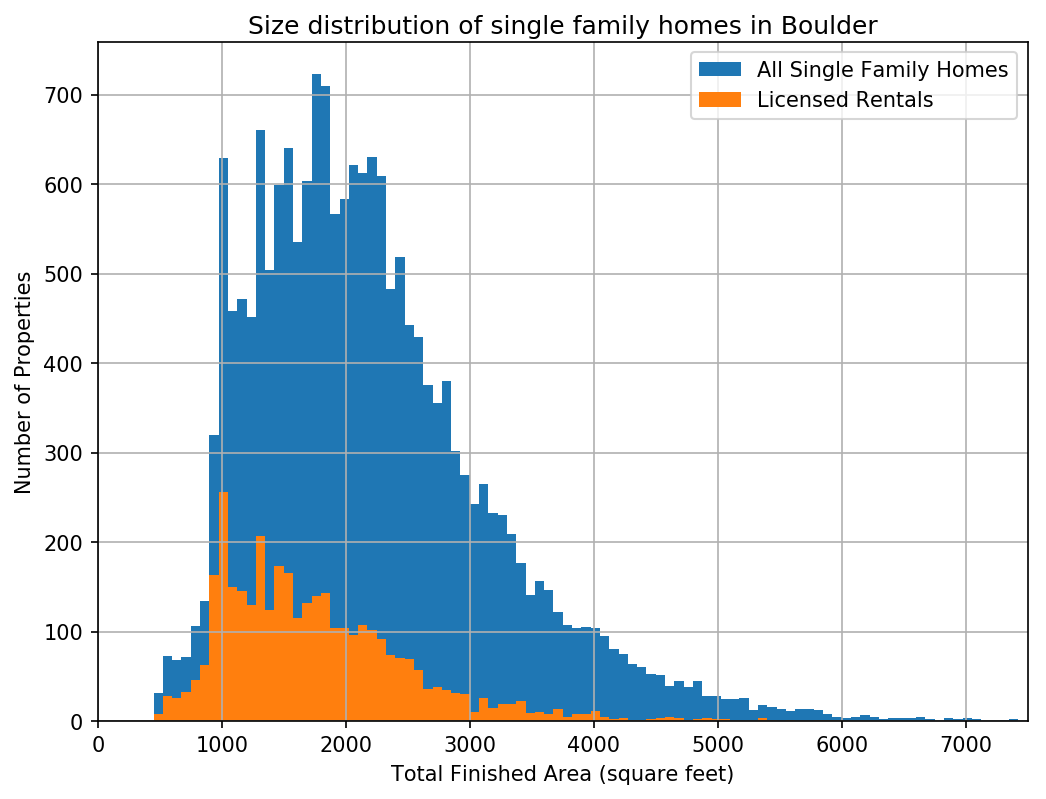

In [105]:
fig=plt.figure(figsize=(8,6),dpi=150,)
plt.hist(nosmall['total_finished_sq_ft'],
         bins=np.arange(0,7500,75),label="All Single Family Homes")
plt.hist(nosmall['total_finished_sq_ft'][(nosmall['rental_license']!='')],
         bins=np.arange(0,7500,75),label="Licensed Rentals")
plt.grid(True)
plt.title('Size distribution of single family homes in Boulder')
plt.xlabel('Total Finished Area (square feet)')
plt.ylabel('Number of Properties')
plt.xlim(0,7500)
plt.legend()

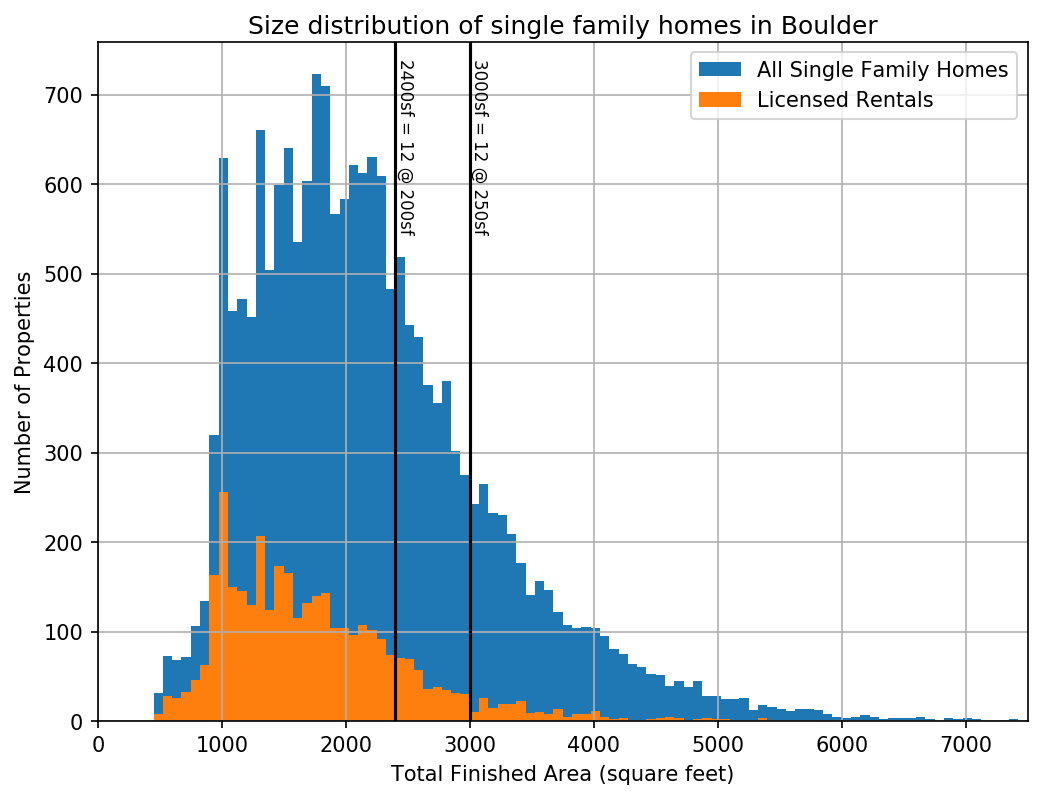

In [117]:
fig=plt.figure(figsize=(8,6),dpi=150,)
plt.hist(nosmall['total_finished_sq_ft'],
         bins=np.arange(0,7500,75),label="All Single Family Homes")
plt.hist(nosmall['total_finished_sq_ft'][(nosmall['rental_license']!='')],
         bins=np.arange(0,7500,75),label="Licensed Rentals")
plt.grid(True)
plt.axvline(2400,c='k')
plt.axvline(3000,c='k')
plt.text(2405, 725, '2400sf = 12 @ 200sf', fontsize=8, rotation=-90)
plt.text(3005, 725, '3000sf = 12 @ 250sf', fontsize=8, rotation=-90)
plt.title('Size distribution of single family homes in Boulder')
plt.xlabel('Total Finished Area (square feet)')
plt.ylabel('Number of Properties')
plt.xlim(0,7500)
plt.legend()

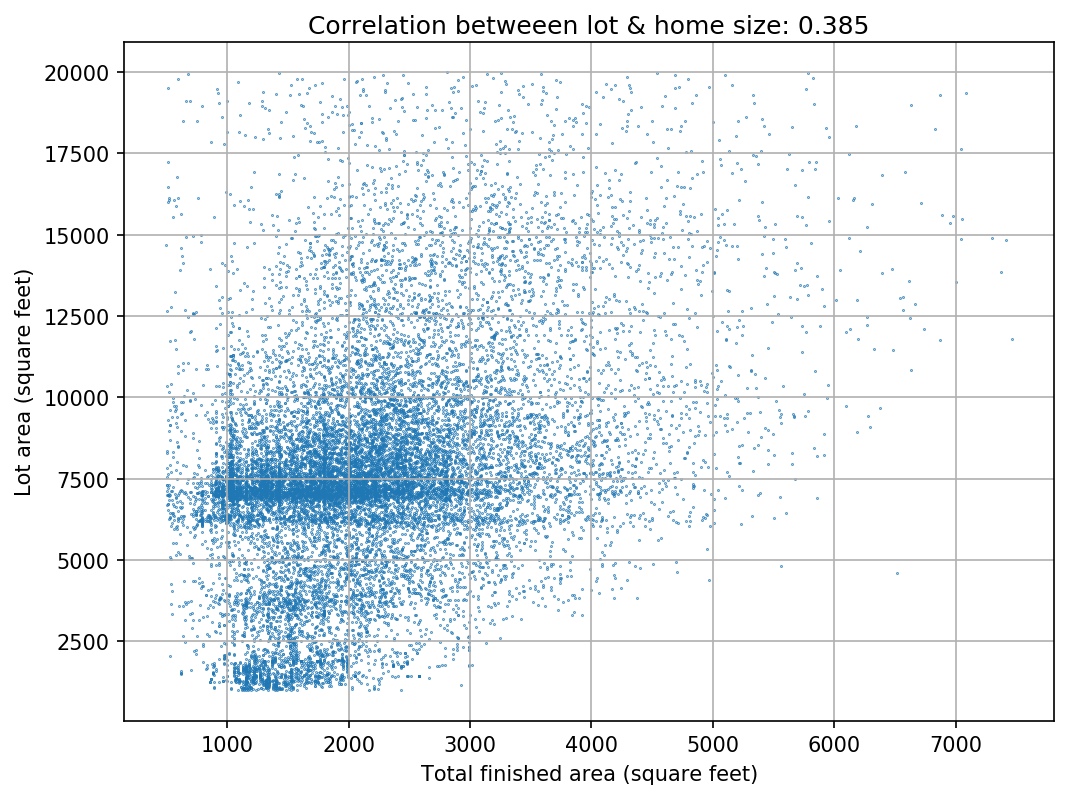

In [7]:
fig=plt.figure(figsize=(8,6),dpi=150,)
nosmall = df[(df['total_finished_sq_ft']>500) & (df['lot_size']>1000)]
plt.scatter(nosmall['total_finished_sq_ft'],nosmall['lot_size'],s=0.1)
lot_home_size_corr = np.corrcoef(nosmall['total_finished_sq_ft'],nosmall['lot_size'])[0,1]
plt.title('Correlation betweeen lot & home size: {:.3f}'.format(lot_home_size_corr))
plt.xlabel('Total finished area (square feet)')
plt.ylabel('Lot area (square feet)')
plt.grid(True)

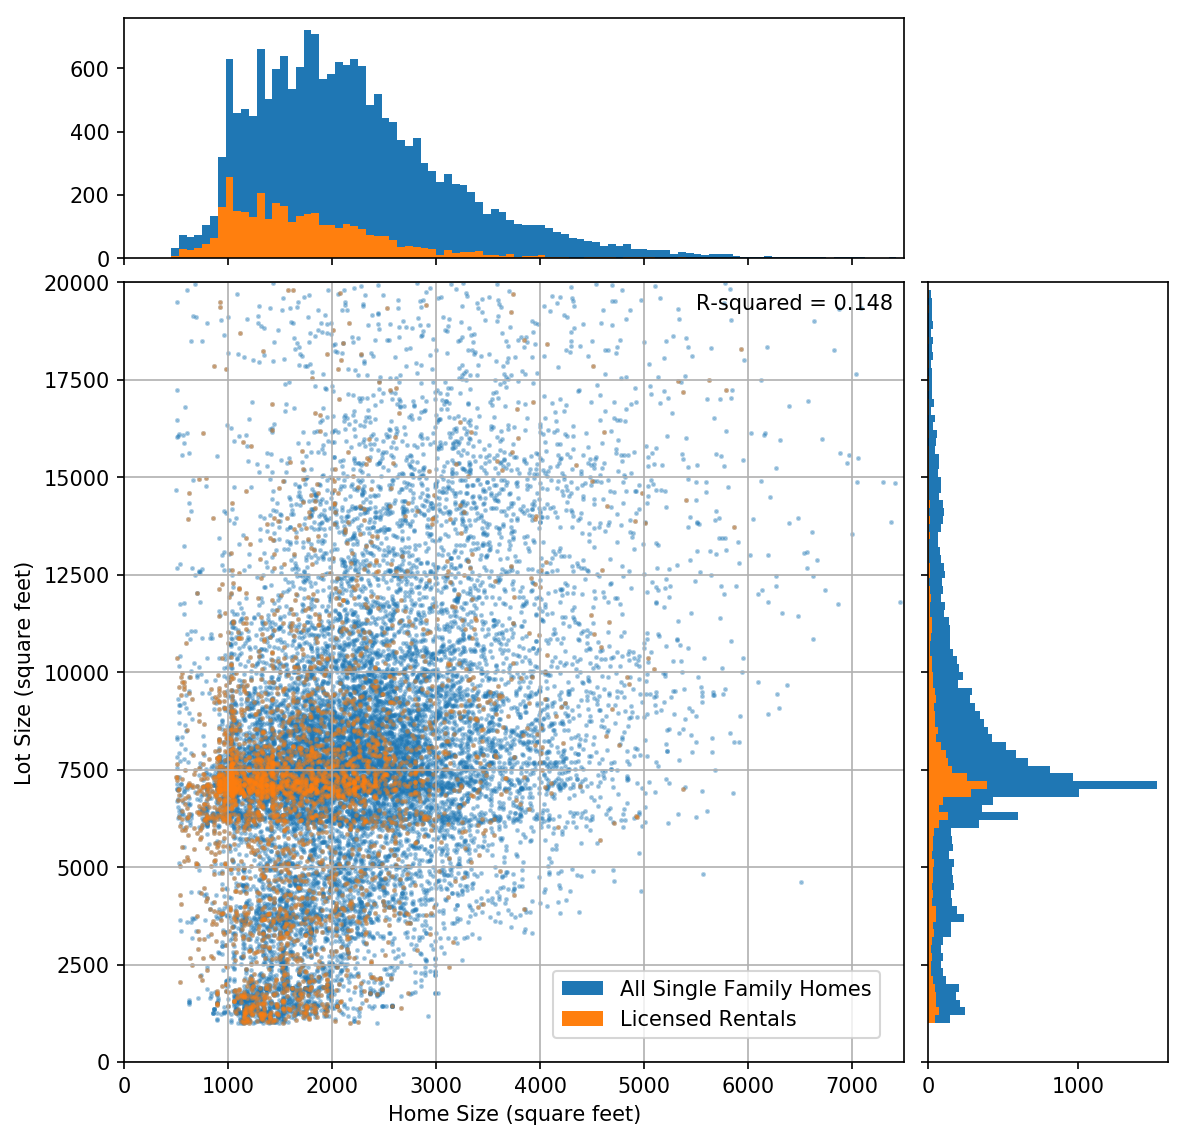

In [66]:
# the random data
x_all = nosmall['total_finished_sq_ft']
y_all = nosmall['lot_size']
x_rent = nosmall['total_finished_sq_ft'][(nosmall['rental_license']!='')]
y_rent = nosmall['lot_size'][(nosmall['rental_license']!='')]

lot_home_size_corr = np.corrcoef(nosmall['total_finished_sq_ft'],nosmall['lot_size'])[0,1]

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8),dpi=150)

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x_all,y_all,s=2,alpha=0.333, label='All Single Family Homes')
axScatter.scatter(x_rent,y_rent,s=2,alpha=0.333, label='Licensed Rentals')
axScatter.grid(True)

axScatter.set_xlim((0, 7500))
axScatter.set_ylim((0, 20000))
axScatter.set_ylabel('Lot Size (square feet)')
axScatter.set_xlabel('Home Size (square feet)')
axScatter.text(5500,19300,'R-squared = {:.3f}'.format(lot_home_size_corr**2))
axHistx.hist(x_all, bins=np.arange(0,7500,75), label='All Single Family Homes')
axHisty.hist(y_all, bins=np.arange(0,20000,200), orientation='horizontal')
axHistx.hist(x_rent, bins=np.arange(0,7500,75), label='Licensed Rentals')
axHisty.hist(y_rent, bins=np.arange(0,20000,200), orientation='horizontal')

axHistx.legend(loc=(0.55,-3.25))

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

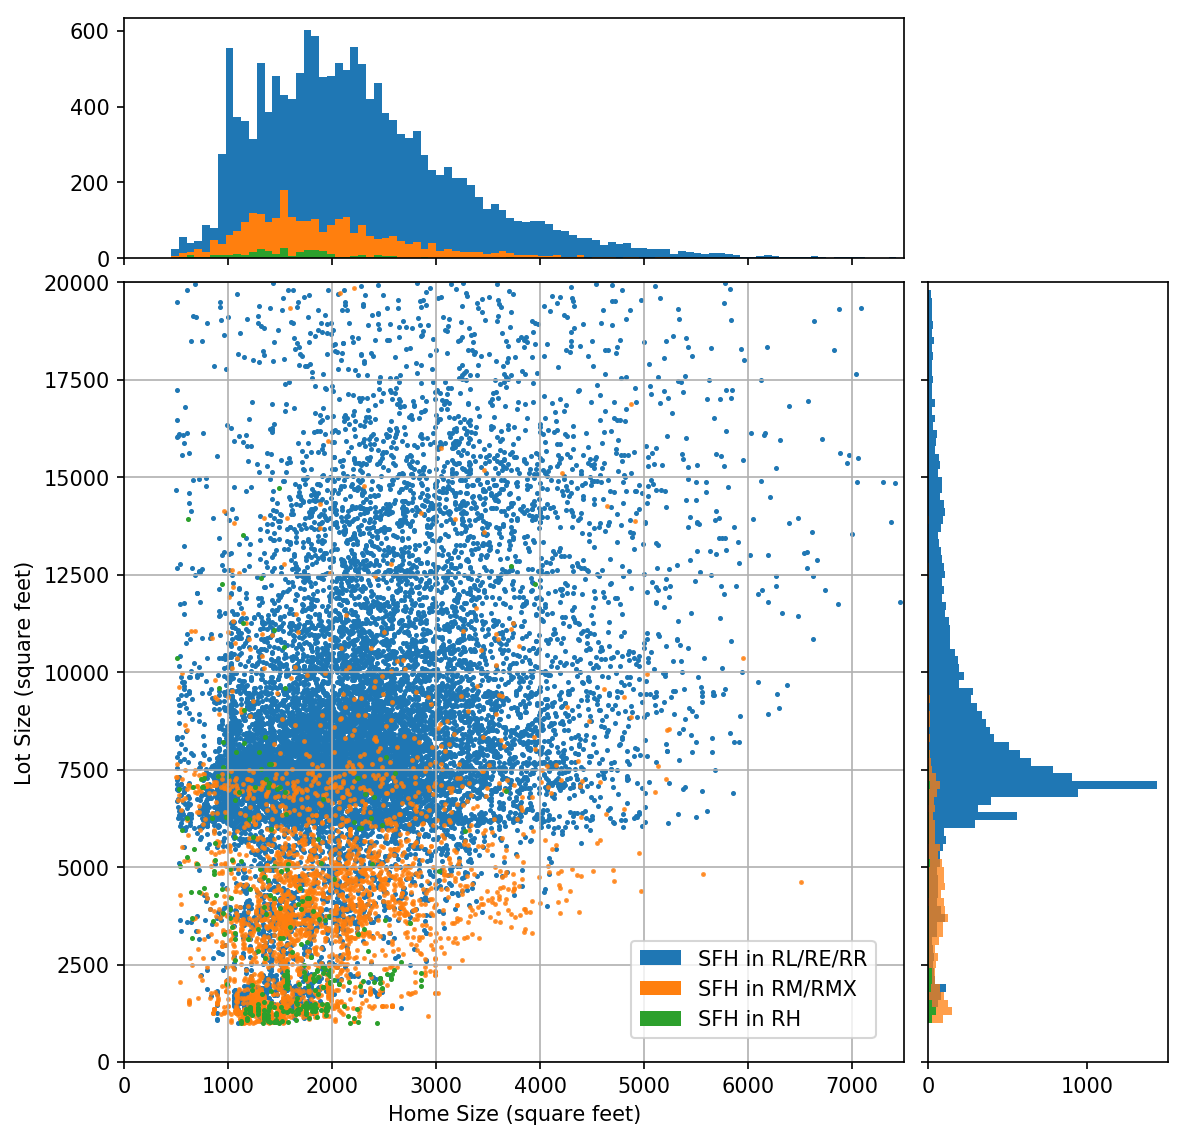

In [65]:
# the random data
x_all = nosmall['total_finished_sq_ft']
y_all = nosmall['lot_size']
x_rent = nosmall['total_finished_sq_ft'][(nosmall['rental_license']!='')]
y_rent = nosmall['lot_size'][(nosmall['rental_license']!='')]

x_rl = nosmall[(nosmall.zone.str.match('^R[L,R,E]+'))]['total_finished_sq_ft']
x_rm = nosmall[(nosmall.zone.str.match('^R[M]+'))]['total_finished_sq_ft']
x_rh = nosmall[(nosmall.zone.str.match('^R[H]+'))]['total_finished_sq_ft']

y_rl = nosmall[(nosmall.zone.str.match('^R[L,R,E]+'))]['lot_size']
y_rm = nosmall[(nosmall.zone.str.match('^R[M]+'))]['lot_size']
y_rh = nosmall[(nosmall.zone.str.match('^R[H]+'))]['lot_size']

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8),dpi=150)

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x_rl,y_rl,s=2,alpha=1, label='RL/RE/RR')
axScatter.scatter(x_rm,y_rm,s=2,alpha=0.75, label='RM/RMX')
axScatter.scatter(x_rh,y_rh,s=2,alpha=1, label='RH')
axScatter.grid(True)

axScatter.set_xlim((0, 7500))
axScatter.set_ylim((0, 20000))
axScatter.set_ylabel('Lot Size (square feet)')
axScatter.set_xlabel('Home Size (square feet)')

axHistx.hist(x_rl, bins=np.arange(0,7500,75), label='SFH in RL/RE/RR')
axHistx.hist(x_rm, bins=np.arange(0,7500,75), label='SFH in RM/RMX')
axHistx.hist(x_rh, bins=np.arange(0,7500,75), label='SFH in RH')
axHisty.hist(y_rl, bins=np.arange(0,20000,200), orientation='horizontal', alpha=1.0)
axHisty.hist(y_rm, bins=np.arange(0,20000,200), orientation='horizontal', alpha=0.75)
axHisty.hist(y_rh, bins=np.arange(0,20000,200), orientation='horizontal', alpha=1.0)
#axHistx.hist([x_rl,x_rm,x_rh], bins=np.arange(0,7500,75), label=['RL/RE/RR','RM/RMX','RH'],stacked=True)

axHistx.legend(loc=(0.65,-3.25))

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

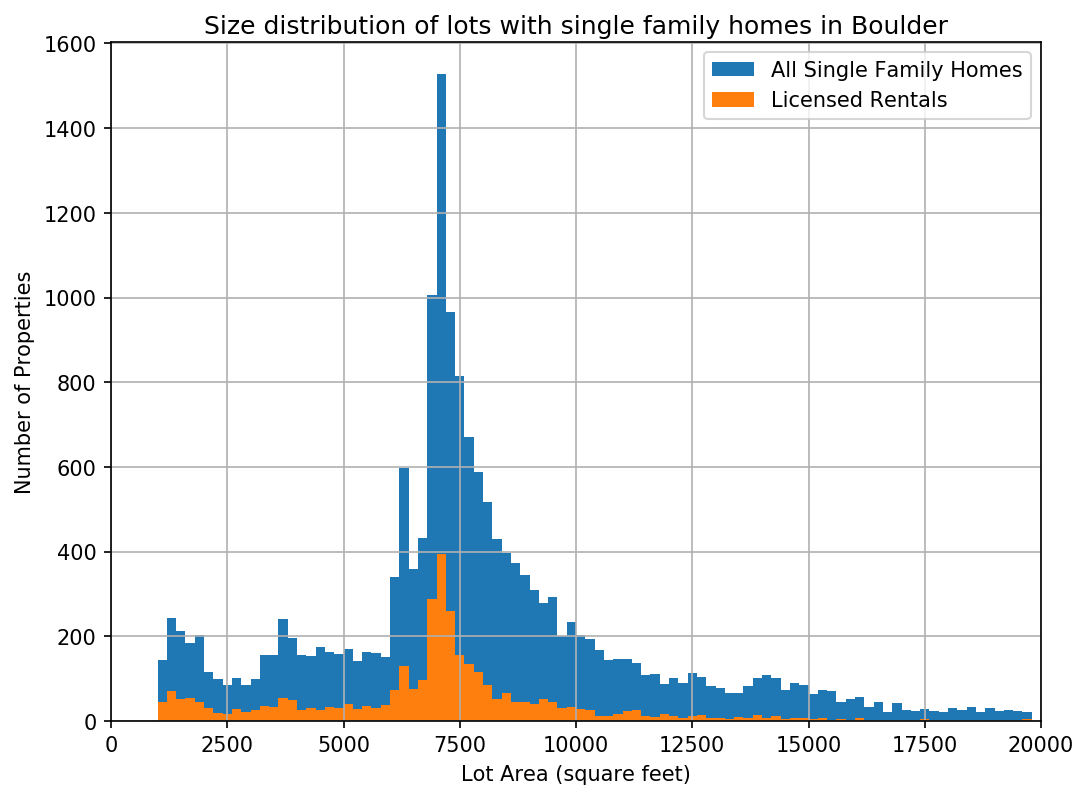

In [89]:
fig=plt.figure(figsize=(8,6),dpi=150,)
plt.hist(nosmall['lot_size'],
         bins=np.arange(0,20000,200),label="All Single Family Homes")
plt.hist(nosmall['lot_size'][(df['rental_license']!='')],
         bins=np.arange(0,20000,200),label="Licensed Rentals")
plt.grid(True)
plt.title('Size distribution of lots with single family homes in Boulder')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Number of Properties')
plt.xlim(0,20000)
plt.legend()

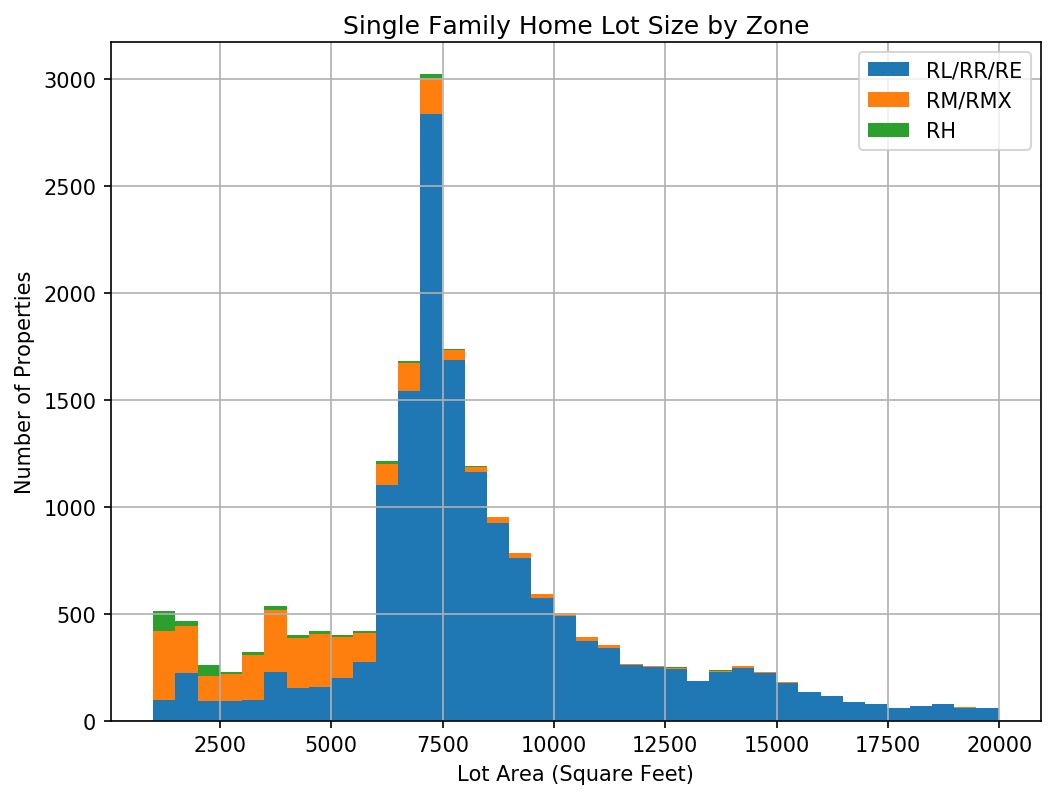

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.set_dpi(150)
ax.grid(True)
x=plt.hist([
    df[(df.zone.str.match('^R[L,R,E]+') & (df.lot_size > 1000))]['lot_size'],
    df[(df.zone.str.match('^R[M]+') & (df.lot_size > 1000))]['lot_size'],
    df[(df.zone.str.match('^R[H]+') & (df.lot_size > 1000))]['lot_size']],
    bins=38, stacked=True, label=['RL/RR/RE','RM/RMX','RH'])
plt.legend()
plt.title('Single Family Home Lot Size by Zone')
plt.ylabel('Number of Properties')
plt.xlabel('Lot Area (Square Feet)')

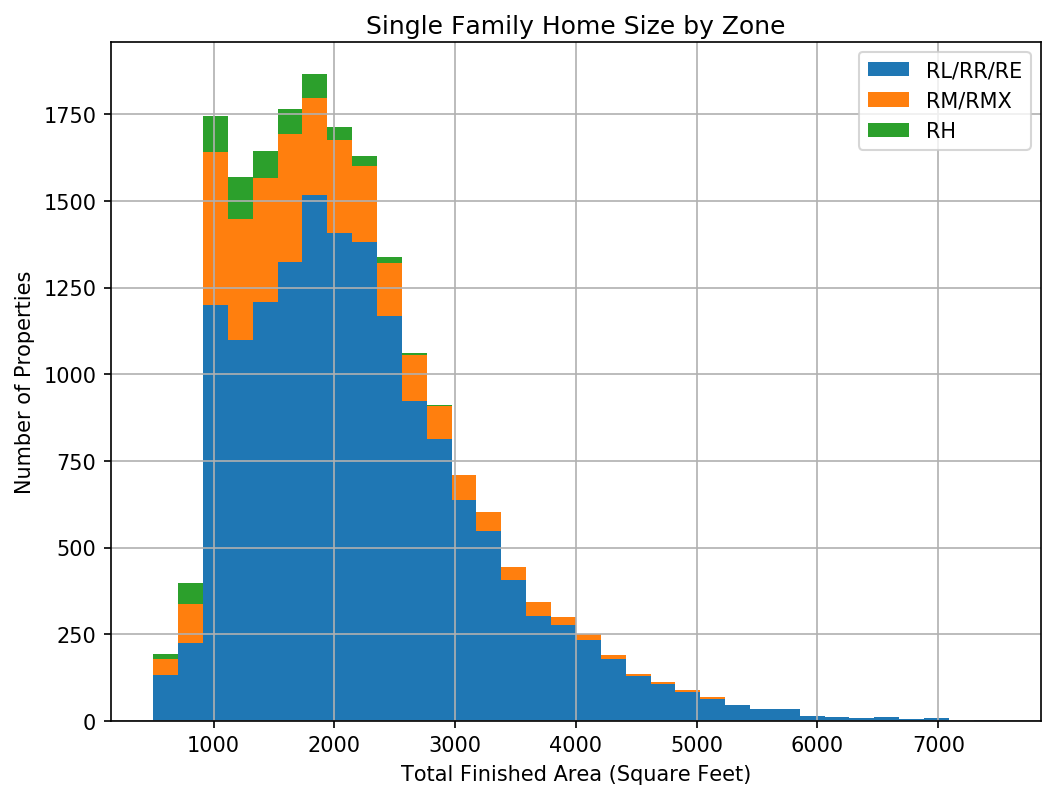

In [8]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.set_dpi(150)
ax.grid(True)
x=plt.hist([
    df[(df.zone.str.match('^R[L,R,E]+') & (df.total_finished_sq_ft > 500))]['total_finished_sq_ft'],
    df[(df.zone.str.match('^R[M]+') & (df.total_finished_sq_ft > 500))]['total_finished_sq_ft'],
    df[(df.zone.str.match('^R[H]+') & (df.total_finished_sq_ft > 500))]['total_finished_sq_ft']],
    bins=np.linspace(500,7500,35), stacked=True, label=['RL/RR/RE','RM/RMX','RH'])
plt.legend()
plt.title('Single Family Home Size by Zone')
plt.ylabel('Number of Properties')
plt.xlabel('Total Finished Area (Square Feet)')

In [9]:
def coopcount(df,
              abs_min_house_size=0,
              sqft_per_person=200,
              base_lot_size=7000,
              base_lot_occupancy=8,
              lot_area_per_person=1000,
              zones=['RL','RM','RH'],
              rl_max=12,
              rm_max=15,
              rh_max=15,
              rental=False):
    num_ppl = np.arange(4,rh_max+1)
    num_coops = []
    pct_coops = []
    total_properties=df.count()[0]
    if rental:
        df = df[(df['rental_license'] != '')]
    for n in num_ppl:
        min_house_size = max(n*sqft_per_person,abs_min_house_size)
        min_lot_size = base_lot_size + (n-base_lot_occupancy)*lot_area_per_person
        houses_avail = df[(df['total_finished_sq_ft']>=min_house_size) &
                          (df['lot_size']>=min_lot_size)]
        num_houses = houses_avail.count()[0]
        num_coops.append(num_houses)
        pct_houses = num_houses/total_properties
        pct_coops.append(pct_houses)
    return(num_ppl,num_coops,pct_coops)

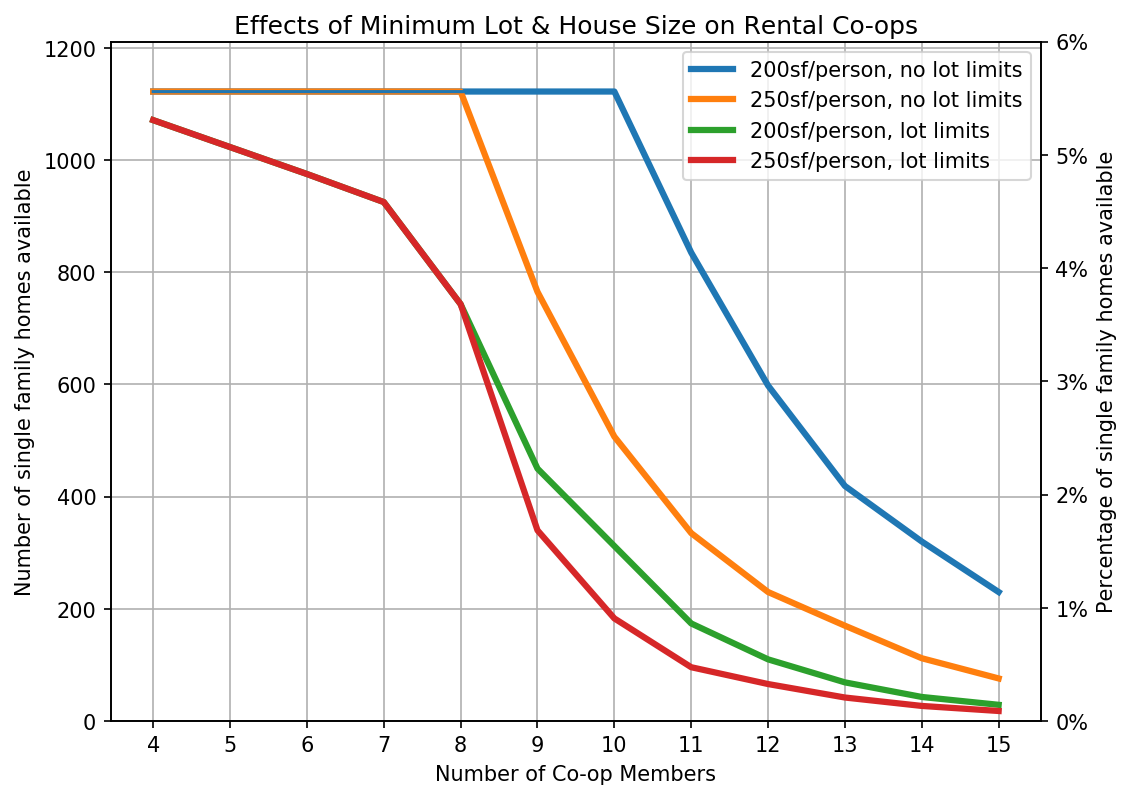

In [10]:
ppl_rent_200nolot, coop_rent_200nolot, pct_coop_rent_200nolot = coopcount(df,
                               abs_min_house_size=2000,
                               sqft_per_person=200,
                               base_lot_size=0,
                               base_lot_occupancy=12,
                               lot_area_per_person=0,
                               rental=True)
ppl_rent_250nolot, coop_rent_250nolot, pct_coop_rent_250nolot = coopcount(df,
                               abs_min_house_size=2000,
                               sqft_per_person=250,
                               base_lot_size=0,
                               base_lot_occupancy=12,
                               lot_area_per_person=0,
                               rental=True)
ppl_rent_200lot, coop_rent_200lot, pct_coop_rent_200lot = coopcount(df,
                               abs_min_house_size=2000,
                               sqft_per_person=200,
                               base_lot_size=7000,
                               base_lot_occupancy=8,
                               lot_area_per_person=1000,
                               rental=True)
ppl_rent_250lot, coop_rent_250lot, pct_coop_rent_250lot = coopcount(df,
                               abs_min_house_size=2000,
                               sqft_per_person=250,
                               base_lot_size=7000,
                               base_lot_occupancy=8,
                               lot_area_per_person=1000,
                               rental=True)

fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.set_dpi(150)
plt.grid(True)
plt.xticks(np.arange(4,17))
plt.xlim(3,16)
plt.title('Effects of Minimum Lot & House Size on Rental Co-ops')
plt.xlabel('Number of Co-op Members')
ax1.set_ylabel('Number of single family homes available')
ax1.plot(ppl_rent_200nolot, coop_rent_200nolot, label='200sf/person, no lot limits', lw=3)
ax1.plot(ppl_rent_250nolot, coop_rent_250nolot, label='250sf/person, no lot limits', lw=3)
ax1.plot(ppl_rent_200lot, coop_rent_200lot, label='200sf/person, lot limits', lw=3)
ax1.plot(ppl_rent_250lot, coop_rent_250lot, label='250sf/person, lot limits', lw=3)
ax2=ax1.twinx()
ax2.set_ylim(0,0.06)
ax1.set_ylim(0,1211)
ax2.plot(ppl_rent_200nolot, pct_coop_rent_200nolot)
ax2vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2vals])
ax2.set_ylabel('Percentage of single family homes available')
#ax1.text(10.5,1000,'minimum house size: {}sf'.format(abs_min_house_size))
#ax1.text(10.5,950,'area per person: {}sf'.format(sqft_per_person))
#ax1.text(10.5,900,'base lot size: {}sf'.format(base_lot_size))
#ax1.text(10.5,850,'lot area per person: {}sf'.format(lot_area_per_person))
#ax1.text(10.5,800,'base lot occupancy: {}'.format(base_lot_occupancy))
#ax1.text(10.5,750,'rental: {}'.format(rental))
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
plt.show()

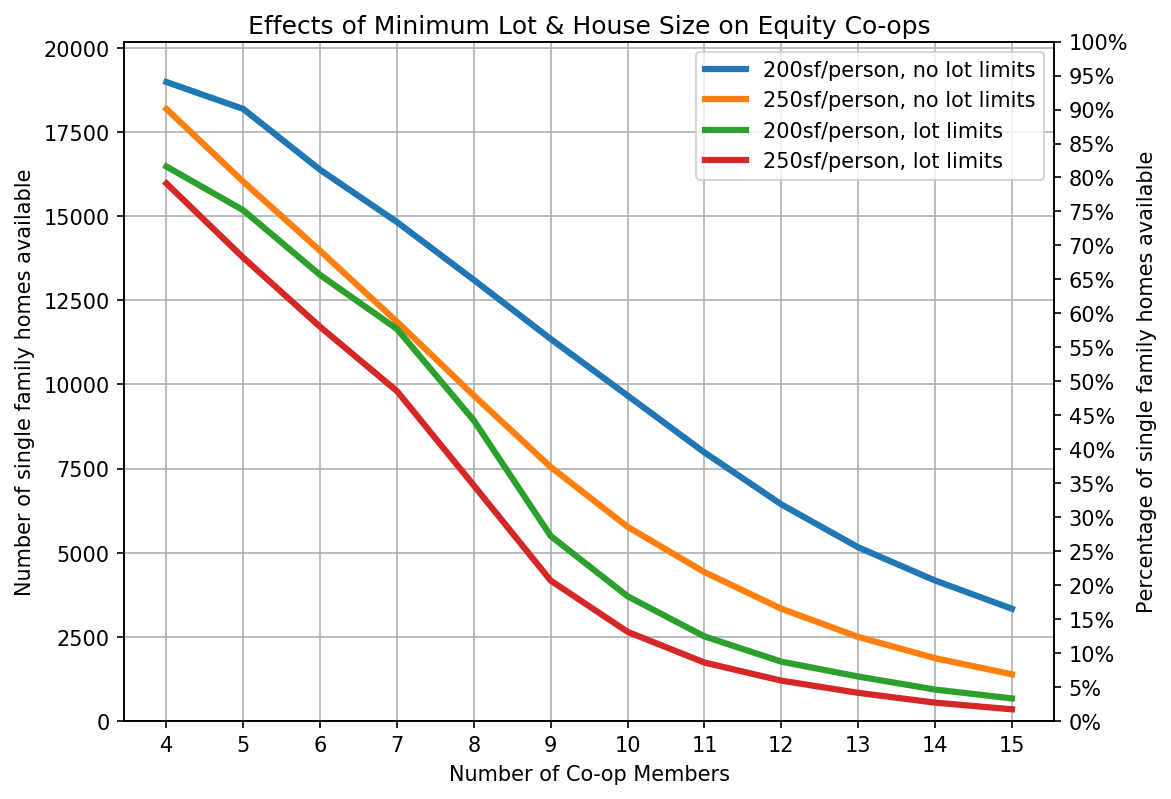

In [12]:
ppl_eq_200nolot, coop_eq_200nolot, pct_coop_eq_200nolot = coopcount(df,
                               abs_min_house_size=0,
                               sqft_per_person=200,
                               base_lot_size=0,
                               base_lot_occupancy=12,
                               lot_area_per_person=0,
                               rental=False)
ppl_eq_250nolot, coop_eq_250nolot, pct_coop_eq_250nolot = coopcount(df,
                               abs_min_house_size=0,
                               sqft_per_person=250,
                               base_lot_size=0,
                               base_lot_occupancy=12,
                               lot_area_per_person=0,
                               rental=False)
ppl_eq_200lot, coop_eq_200lot, pct_coop_eq_200lot = coopcount(df,
                               abs_min_house_size=0,
                               sqft_per_person=200,
                               base_lot_size=7000,
                               base_lot_occupancy=8,
                               lot_area_per_person=1000,
                               rental=False)
ppl_eq_250lot, coop_eq_250lot, pct_coop_eq_250lot = coopcount(df,
                               abs_min_house_size=0,
                               sqft_per_person=250,
                               base_lot_size=7000,
                               base_lot_occupancy=8,
                               lot_area_per_person=1000,
                               rental=False)
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.set_dpi(150)
plt.grid(True)
plt.xticks(np.arange(4,17))
plt.xlim(3,16)
plt.title('Effects of Minimum Lot & House Size on Equity Co-ops')
plt.xlabel('Number of Co-op Members')
ax1.set_ylabel('Number of single family homes available')
ax1.plot(ppl_eq_200nolot, coop_eq_200nolot, label='200sf/person, no lot limits', lw=3)
ax1.plot(ppl_eq_250nolot, coop_eq_250nolot, label='250sf/person, no lot limits', lw=3)
ax1.plot(ppl_eq_200lot, coop_eq_200lot, label='200sf/person, lot limits', lw=3)
ax1.plot(ppl_eq_250lot, coop_eq_250lot, label='250sf/person, lot limits', lw=3)
ax2=ax1.twinx()
ax2.set_ylim(0,1,10)
ax1.set_ylim(0,20187)
ax2.plot(ppl_eq_200nolot, pct_coop_eq_200nolot)
ax2.set_yticks(np.linspace(0,1,21))
ax2vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2vals])
ax2.set_ylabel('Percentage of single family homes available')
#ax1.text(10.5,1000,'minimum house size: {}sf'.format(abs_min_house_size))
#ax1.text(10.5,950,'area per person: {}sf'.format(sqft_per_person))
#ax1.text(10.5,900,'base lot size: {}sf'.format(base_lot_size))
#ax1.text(10.5,850,'lot area per person: {}sf'.format(lot_area_per_person))
#ax1.text(10.5,800,'base lot occupancy: {}'.format(base_lot_occupancy))
#ax1.text(10.5,750,'rental: {}'.format(rental))
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
plt.show()

In [79]:
df.shape

(20187, 5)

In [129]:
df[(df['total_finished_sq_ft']>3000) & (df['total_finished_sq_ft']<5000)].shape

(3064, 5)

In [94]:
nosmall[(nosmall['total_finished_sq_ft']>3000)&(nosmall['rental_license']!='')].shape

(226, 5)

In [99]:
nosmall[(nosmall['lot_size']>11000)].shape[0]/20187

0.1394957150641502

In [103]:
nosmall[(nosmall['lot_size']>11000) & (nosmall['rental_license']!='') &(nosmall['total_finished_sq_ft']>3000)].shape[0]

66

In [102]:
20187*0.0003269

6.5991303

In [132]:
nosmall[(nosmall['total_finished_sq_ft']>2400) & (nosmall['rental_license']!='')].shape

(588, 5)